## K Nearest Neighbours Algorithm 

### Load Libraries 

In [19]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load data 

In [9]:
iris = datasets.load_iris()

In [13]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
X,y = iris.data,iris.target

### Scale the data 

In [21]:
# Always make sure to scale the data while using distance based algorithms or algorithms using Gradient Descent Optimization.

scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)

### Pair Plot to check the data distribution 

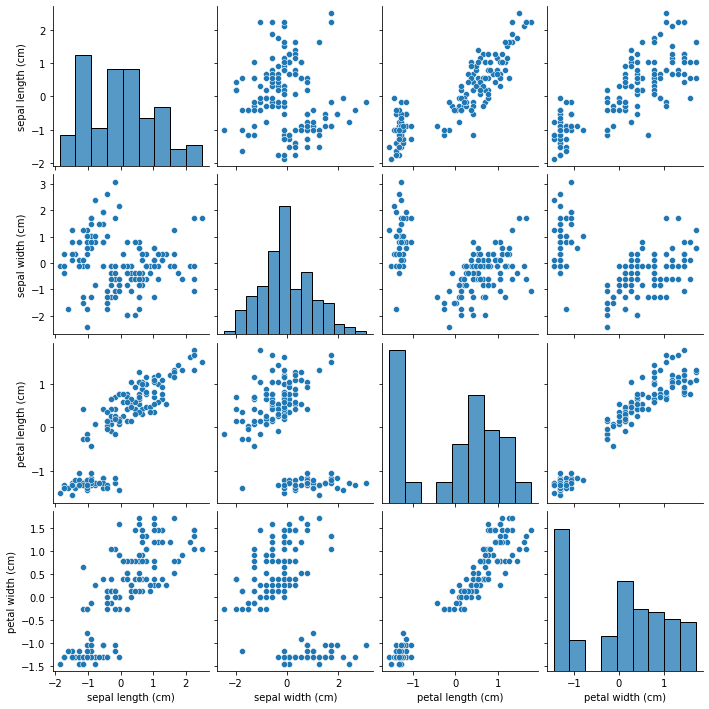

In [31]:
sns.pairplot(pd.DataFrame(Scaled_X,columns=iris.feature_names))

### Split the data into train and test 

In [32]:
X_train,X_test,y_train,y_test = train_test_split(Scaled_X,y,test_size=0.3,random_state=0)

### Train the Model 

We are going to choose optimum value for K later using Error rate vs K values plot or Elbow method...for now we'll just train our model with any ranodm K value

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
# Fit the Model

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
pred = knn.predict(X_test)

### Predictions and Evaluations 

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [48]:
print(confusion_matrix(y_test,pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


In [49]:
print(accuracy_score(y_test,pred))

0.9555555555555556


In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### Let's Choose K 

In [70]:
acc_score = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,y_train,cv=10)
    acc_score.append(score.mean())

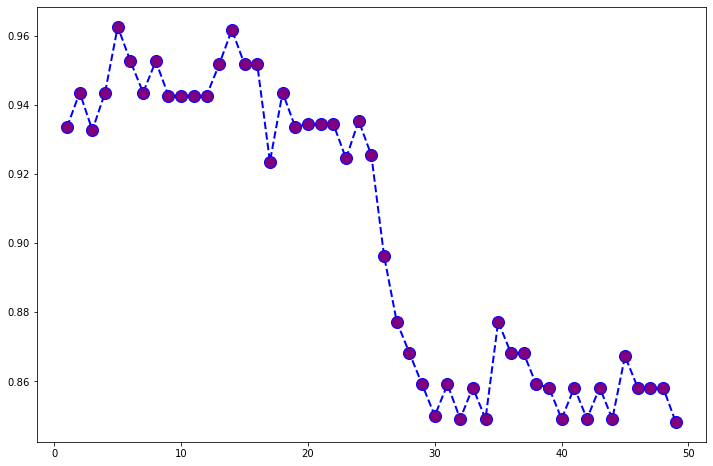

In [71]:
# Let's visualize

plt.figure(figsize=(12,8))
plt.plot(list(range(1,50)),acc_score,color='blue', marker='o', linestyle='dashed',linewidth=2, markerfacecolor='purple',markersize=12)


It looks like after K=15 the Accuracy Score never went up so we can take that value. We can also verify this using error rate in addition to accuracy score.

In [72]:
# Lets calculate accuracy score 

error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,y_train,cv=10)
    error_rate.append(1-score.mean())

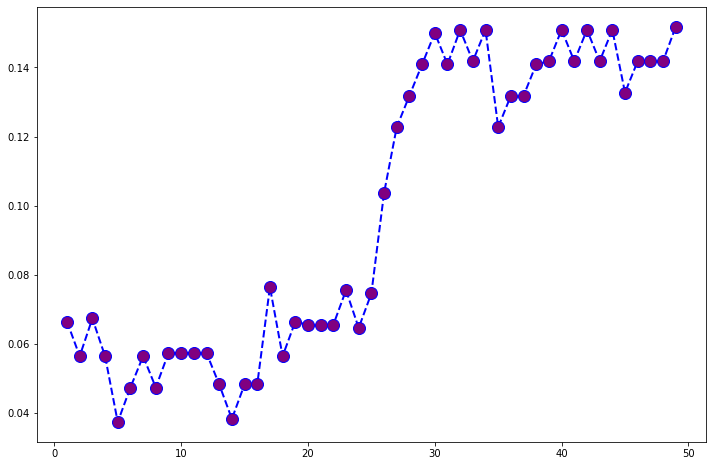

In [73]:
# Let's visualize

plt.figure(figsize=(12,8))
plt.plot(list(range(1,50)),error_rate,color='blue', marker='o', linestyle='dashed',linewidth=2, markerfacecolor='purple',markersize=12)


Again you can see that after K=15 the error rate never went down. So we'll take this as our final K value and see if it increases the accuracy of our model.

In [74]:
# Final Model

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [75]:
print(confusion_matrix(y_test,pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [77]:
print(accuracy_score(y_test,pred))

0.9777777777777777


In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



So choosing the optimum value for K did increase the accuracy of our model.